<h1 align='center'>Time Series Analysis of Sales Data</h1>

In this section, I will explore different methodology to analyze time series records. I will also introduce a wonderful python module `statsmodels` that we can use to analyse the data more effectively.

## Contents

- Introduction to statsmodels
- Time Series Stationarity
- Granger Causality Tests
- Time Series Decomposition
- Exponentially weighted moving average
- Holt Winter methods

I will also put some maths behind each method for better understanding.

Let's get started!

## Introduction to statsmodels

Statsmodels is python module that provides classes and functions for estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. 

Let's see statsmodels functionalities on a real data.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Load the data

In [2]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)

### Plot

In [3]:
df.shape

(9994, 20)

In [4]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\655842290.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [5]:
#resample the data on Monthly level
df = df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


[Text(0, 0.5, 'Total Monthly Sales of Furniture')]

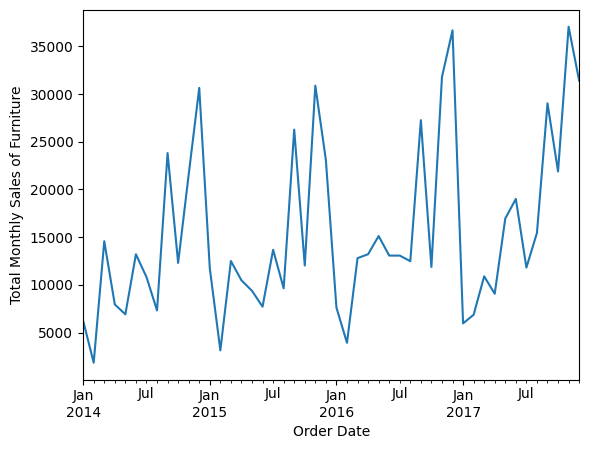

In [6]:
ax = df['Sales'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Sales of Furniture')

In [7]:
import seasonal

In [8]:
def seasonal_period_udf(counts):
    
    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): return len(seasons)
    else: return -1

In [9]:
seasonal_period_udf(df['Sales'].values)

12

### Trend calculation

We can use functionalitis of statsmodels to get the trend value from a time series data.

Here we can use <tt>statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600)</tt> the `Hodrick Prescott` filter. It filter out time series $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$.



In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

#get the values
sales_cycle, sales_trend = hpfilter(df['Sales'], lamb=1200)


In [11]:
sales_cycle

Order Date
2014-01-01    -2237.785515
2014-02-01    -7194.116597
2014-03-01     4988.582143
2014-04-01    -2182.411378
2014-05-01    -3742.908393
2014-06-01     2040.932142
2014-07-01     -826.051041
2014-08-01    -4774.134886
2014-09-01    11316.777440
2014-10-01     -546.914385
2014-11-01     8418.193169
2014-12-01    17262.340394
2015-01-01    -1826.442980
2015-02-01   -10579.349704
2015-03-01    -1343.107196
2015-04-01    -3486.616147
2015-05-01    -4704.357894
2015-06-01    -6484.098258
2015-07-01     -645.286765
2015-08-01    -4800.086824
2015-09-01    11723.284596
2015-10-01    -2616.805703
2015-11-01    16160.767377
2015-12-01     8308.040006
2016-01-01    -7205.428753
2016-02-01   -10964.215502
2016-03-01    -2173.990620
2016-04-01    -1875.412441
2016-05-01     -108.761638
2016-06-01    -2327.801041
2016-07-01    -2528.229846
2016-08-01    -3338.469115
2016-09-01    11193.779650
2016-10-01    -4459.459797
2016-11-01    15170.704149
2016-12-01    19768.249808
2017-01-01   -112

In [12]:
type(sales_cycle)

pandas.core.series.Series

In [13]:
sales_trend

Order Date
2014-01-01     8480.310515
2014-02-01     9033.774597
2014-03-01     9585.373857
2014-04-01    10127.248378
2014-05-01    10655.695393
2014-06-01    11165.193458
2014-07-01    11647.102041
2014-08-01    12094.481386
2014-09-01    12499.703360
2014-10-01    12851.161385
2014-11-01    13146.679531
2014-12-01    13383.626106
2015-01-01    13566.384580
2015-02-01    13713.723704
2015-03-01    13842.890196
2015-04-01    13962.314647
2015-05-01    14079.308394
2015-06-01    14198.277258
2015-07-01    14319.706765
2015-08-01    14438.679024
2015-09-01    14549.738404
2015-10-01    14643.429203
2015-11-01    14720.065123
2015-12-01    14777.779194
2016-01-01    14828.171753
2016-02-01    14889.766502
2016-03-01    14975.082620
2016-04-01    15087.502441
2016-05-01    15228.596638
2016-06-01    15398.373041
2016-07-01    15596.748846
2016-08-01    15821.701415
2016-09-01    16069.101250
2016-10-01    16332.036797
2016-11-01    16612.924651
2016-12-01    16910.465192
2017-01-01    172

Trend seems monotonically increasing from `2014-01-01` to `2017-12-01`

Append the trend value in additiona columns

In [14]:
df['Trend'] = sales_trend

In [15]:
df.head(4)

,Sales,Trend
Order Date,,
2014-01-01,6242.525,8480.310515
2014-02-01,1839.658,9033.774597
2014-03-01,14573.956,9585.373857
2014-04-01,7944.837,10127.248378


#### Plot the trend

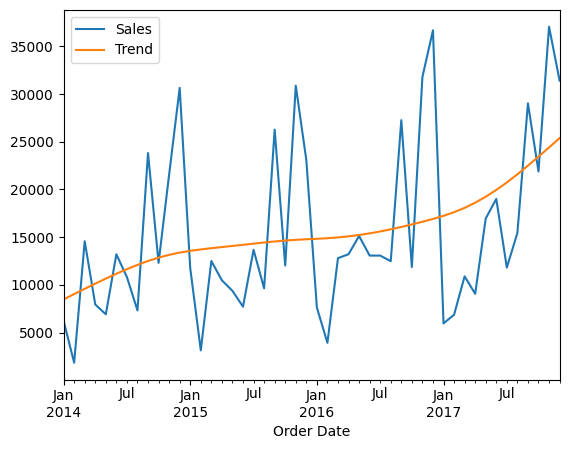

In [16]:
df[['Sales', 'Trend']].plot().autoscale(axis='x', tight=True)

#### Plot the cyclic values

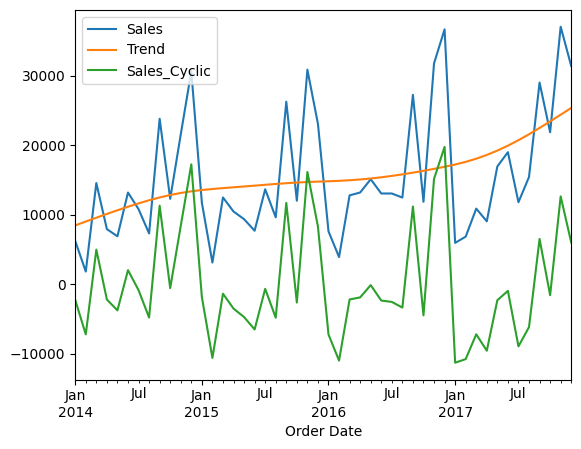

In [17]:
df['Sales_Cyclic'] = sales_cycle

df[['Sales', 'Trend', 'Sales_Cyclic']].plot().autoscale(axis='x', tight=True)

From the graph it is evident that the original series is summation of trend component and the cyclic component.

## Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points. That is, no matter where you take your observations, the result should be same. A series that shows seasonality is not stationary.

**How to test if a series is stationary?**

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

In [18]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [19]:
# Load a seasonal dataset
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

### Augmented Dickey-Fuller Test

To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). 

The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

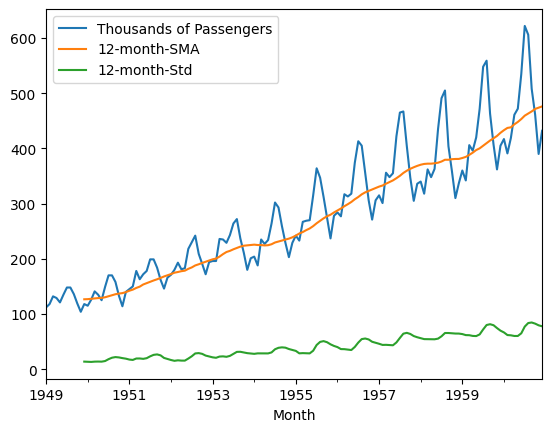

In [20]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

Not only is this dataset seasonal with a clear upward trend, the standard deviation increases over time as well.

In [21]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

To find out what these values represent we can run <tt>help(adfuller)</tt>. Then we can add our own labels:

In [22]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.<br>
Note: in statistics we don't "accept" a null hypothesis - nothing is ever truly proven - we just fail to reject it.
<br><br>
Now let's apply the ADF test to stationary data with the Quaterly Total Alcohol Sales dataset.

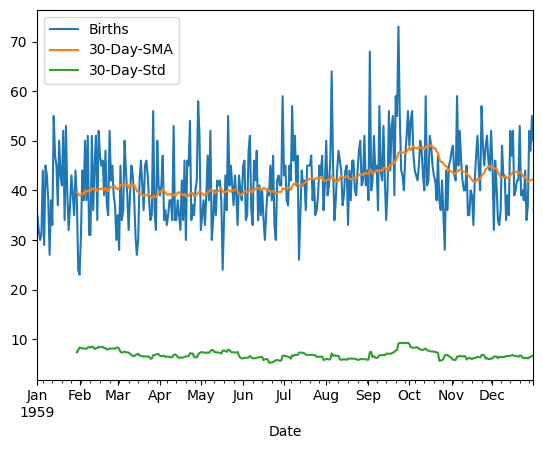

In [23]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [24]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In this case our p-value is very low at 0.000052, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary.

## Granger Causality Tests

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. 

While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. 

This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.


In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example Let's explore the Frniture sales and profit.

In [25]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)


In [26]:
#plot the sales data of furniture
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})
df.sort_index(inplace=True)
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\1700177964.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum, 'Profit':sum})


,Sales,Profit
Order Date,,
2014-01-06,2573.820,746.4078
2014-01-07,76.728,-53.7096
2014-01-10,51.940,21.2954
2014-01-11,9.940,3.0814


<Axes: xlabel='Order Date'>

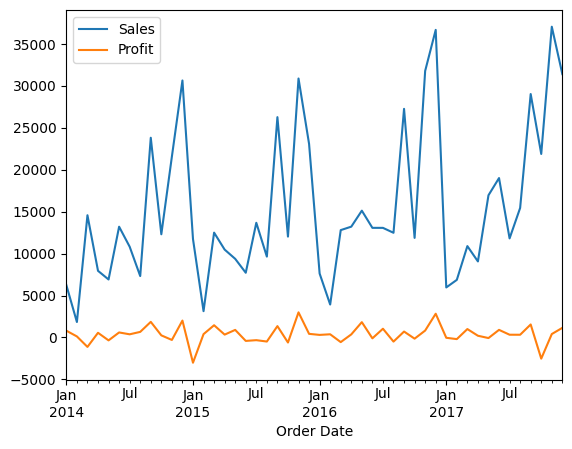

In [27]:
df = df.resample(rule='MS').sum()

df.plot()

### Run the Test

The function takes in a 2D array [y,x] and a maximum number of lags to test on x. Here our y is column 'a' and x is column 'd'. We'll set maxlags to 3.

In [28]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df[['Sales','Profit']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0106  , p=0.0183  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=6.4204  , p=0.0113  , df=1
likelihood ratio test: chi2=6.0182  , p=0.0142  , df=1
parameter F test:         F=6.0106  , p=0.0183  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9651  , p=0.0627  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=6.6535  , p=0.0359  , df=2
likelihood ratio test: chi2=6.2142  , p=0.0447  , df=2
parameter F test:         F=2.9651  , p=0.0627  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9778  , p=0.1337  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=7.0263  , p=0.0711  , df=3
likelihood ratio test: chi2=6.5289  , p=0.0885  , df=3
parameter F test:         F=1.9778  , p=0.1337  , df_denom=38, df_num=3


## Time Series Decomposition

The decomposition of a time series attempts to isolate individual components from the original series.

    - Trend
    - Seasonality
    - Error/Noise

These values let us see quickly and visually what each component contributes to overall behaviour.

**Model types:**

    - Additive model - It is more appropriate when it seems that the trend is more linear and the seasonality and trend components seems to be constant over time(e.g each easr we add 1000 additional customers)
    - Multiplicative model - It seems more appropriate when we are increasing(or decreasing) at a non-linear rate(e.g. each year we triple sales data)

Let up apply the above methods to our furniture sales data.

In [29]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


<Axes: xlabel='Order Date'>

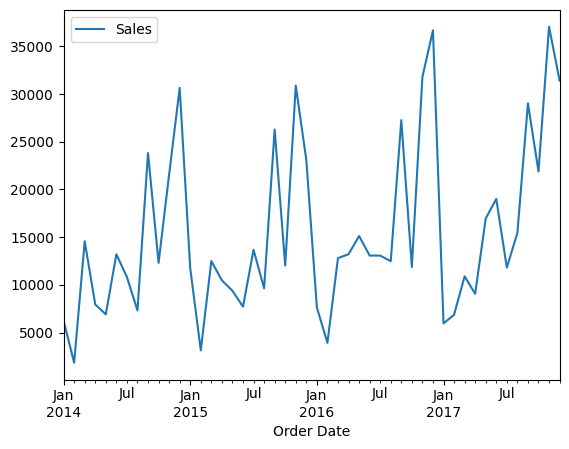

In [30]:
df.plot()

From above chart it seems the trend is somewhat constant so we can use `additive` model here. 

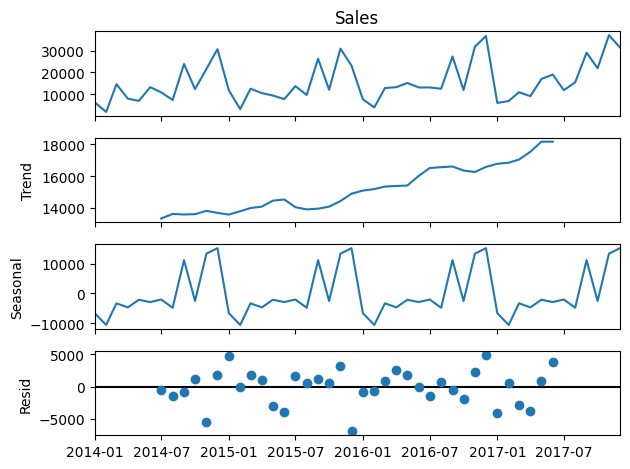

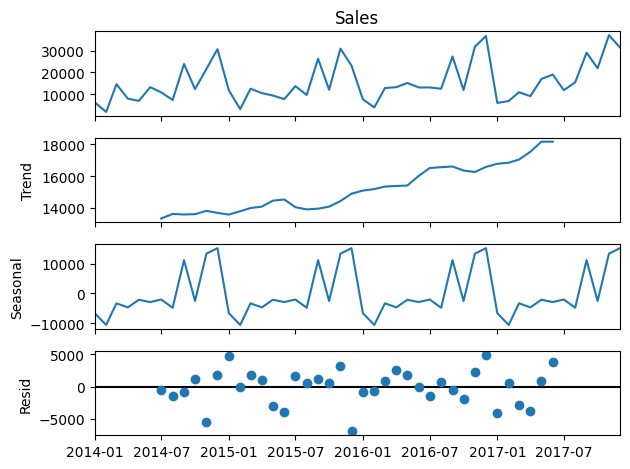

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')

result.plot()

We have decomposed out sales series into three components `Trend`, `Seasonal` and `Residual`. 

## Moving average and Exponentially moving avearge

In this section we will talk about Moving avearge and exponentially weighted moving average in terms of complexity and performance. 

**In Pandas we have:**
<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=green>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=green>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

### Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data Loader

In [33]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


### Simple Moving Average(SMA)

Let's calculate the moving average of sales for quaterly(3 months span) and half yearly.

In [34]:
#append quaterly MA and half yearly MA
df['3-month-SMA'] = df['Sales'].rolling(window=3).mean()

df['6-month-SMA'] = df['Sales'].rolling(window=6).mean()

df.head(10)


,Sales,3-month-SMA,6-month-SMA
Order Date,,,
2014-01-01,6242.5250,NaN,NaN
2014-02-01,1839.6580,NaN,NaN
2014-03-01,14573.9560,7552.046333,NaN
2014-04-01,7944.8370,8119.483667,NaN
2014-05-01,6912.7870,9810.526667,NaN
2014-06-01,13206.1256,9354.583200,8453.314767
2014-07-01,10821.0510,10313.321200,9216.402433
2014-08-01,7320.3465,10449.174367,10129.850517
2014-09-01,23816.4808,13985.959433,11670.271317


<Axes: xlabel='Order Date'>

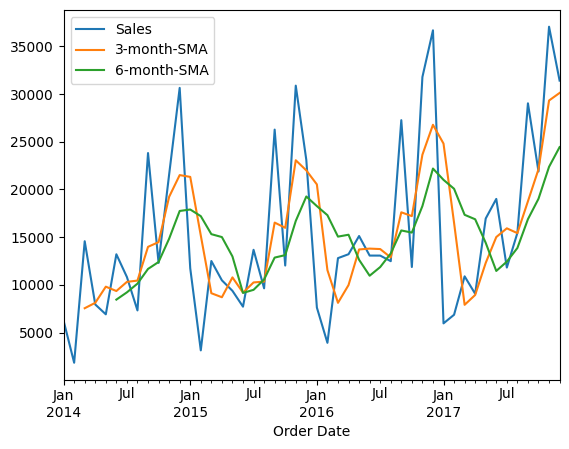

In [35]:
df.plot()

### Issues with SMA

- Samller window may lead to more noise and less signal
- It will always lag by the size of the window
- It never gonna reach the peak or valley of the data due to averaging.
- Extreme historical values can skew the SMA significantly.

### Exponentially weighted moving avearge(EWMA)

It allows to reduce the lag effect from SMA and it will put more weight on values that occured more recently. It does apply more weight on values that occured more recently. The amount of weight applied to the most recent values will depend on actual parameters used in EWMA and the number of periods given a window size.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, **how to we define the weight term $w_i$?**

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + \ldots + (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + \ldots + (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{align}y_0 &= x_0 \\ y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{align}$

which is equivalent to using weights:

$\begin{align}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{align}$


When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

$\begin{align}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{align}$

 * <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [36]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [37]:
#append ewma for span of three months
df['3-span-EWMA'] = df['Sales'].ewm(span=12, adjust=False).mean()


<Axes: xlabel='Order Date'>

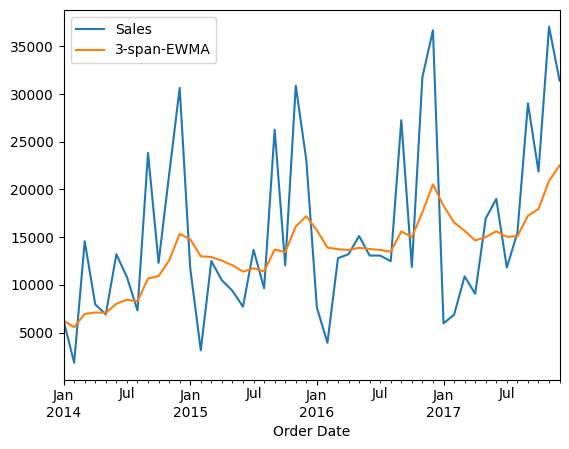

In [38]:
df.plot()

### Compare SMA and EWMA

<Axes: xlabel='Order Date'>

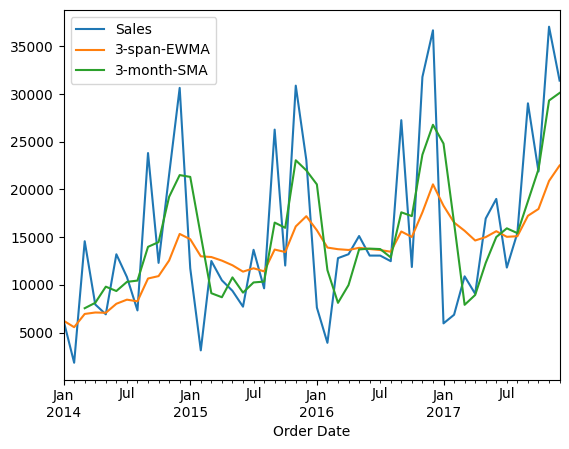

In [39]:
#append SMA with window size of 3
df['3-month-SMA'] = df['Sales'].rolling(window=3).mean()

df.plot()

Note that **Simple exponential smoothing** technique does a poor job of forecasting when there is a trend in the data as seen above.

## Holt-Winters Methods

In the above section we use Simple Exponential Smoothing using just one smoothing factor $\alpha$(alpha). But that did not do well on accounting other factors like trend and seasonality. Now we will look at some advanced methods like *Double* and *Triple Exponential Smoothing* with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>.

**Contents**

- Simple exponentially smoothing
- Double exponential smoothing(Holt's method)
- Triple exponential smoothing(Holt-Winters methods)


#### Imports

In [40]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df = df.resample('MS').sum()
df.head(4)

C:\Users\olimartin\AppData\Local\Temp\ipykernel_12340\3699286814.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [41]:
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

Note that inorder to build a Holt-Winter smoothing model, statsmodels needs to know the frequency of the data whether it's daily, monthly etc. We have already resampled the original data into start of each month(MS).

In [42]:
df.index.freq

<MonthBegin>

### Simple Exponential Smoothing

A variatiob of the statsmodels Holt-Winters function provides Simple Exponential Smoothing.


A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{align}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{align}$

<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=green>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 3
#define alpha
alpha = 2/(span+1)

#exponentially weightage moving average using pandas 
df['EWMA3'] = df['Sales'].ewm(alpha=alpha, adjust=False).mean()
#Simple exponential smoothing
df['SES3'] = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=alpha, 
                                                 optimized=False).fittedvalues.shift(-1)

df.head()

,Sales,EWMA3,SES3
Order Date,,,
2014-01-01,6242.525,6242.525000,6242.525000
2014-02-01,1839.658,4041.091500,4041.091500
2014-03-01,14573.956,9307.523750,9307.523750
2014-04-01,7944.837,8626.180375,8626.180375
2014-05-01,6912.787,7769.483688,7769.483688


<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

### Double Exponential Smoothing (Holt's Method)

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:


\begin{align}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model } h = \text{\# periods into the future}\end{align}



- Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. 
- Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). 
- The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESAdd'] = ExponentialSmoothing(df['Sales'], trend='add').fit().fittedvalues.shift(-1)

df.head(5)

c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd
Order Date,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718


### Plot the result

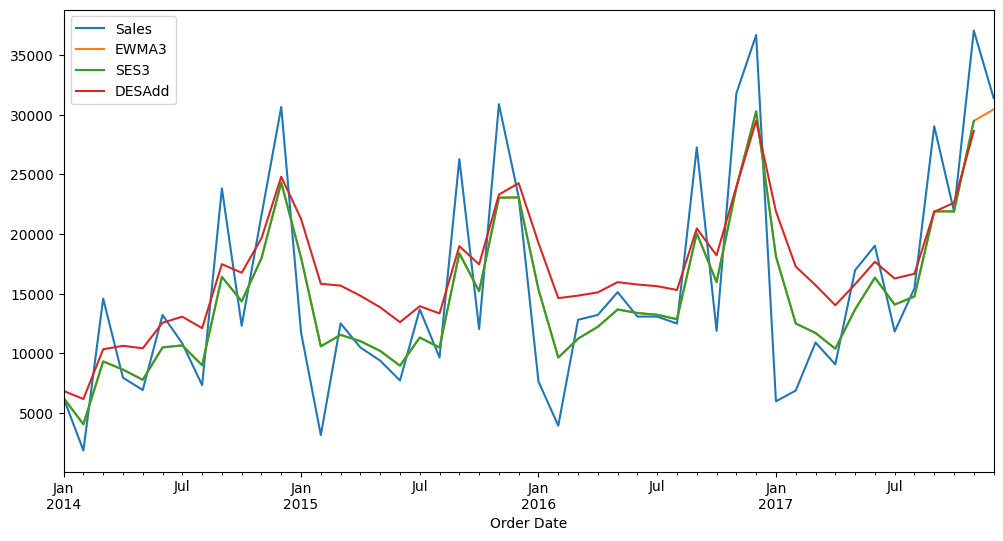

In [45]:
df[['Sales', 'EWMA3', 'SES3', 'DESAdd']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [46]:
df['DESMul'] = ExponentialSmoothing(df['Sales'], trend='mul').fit().fittedvalues.shift(-1)

df.head(5)

c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul
Order Date,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104


### Plot

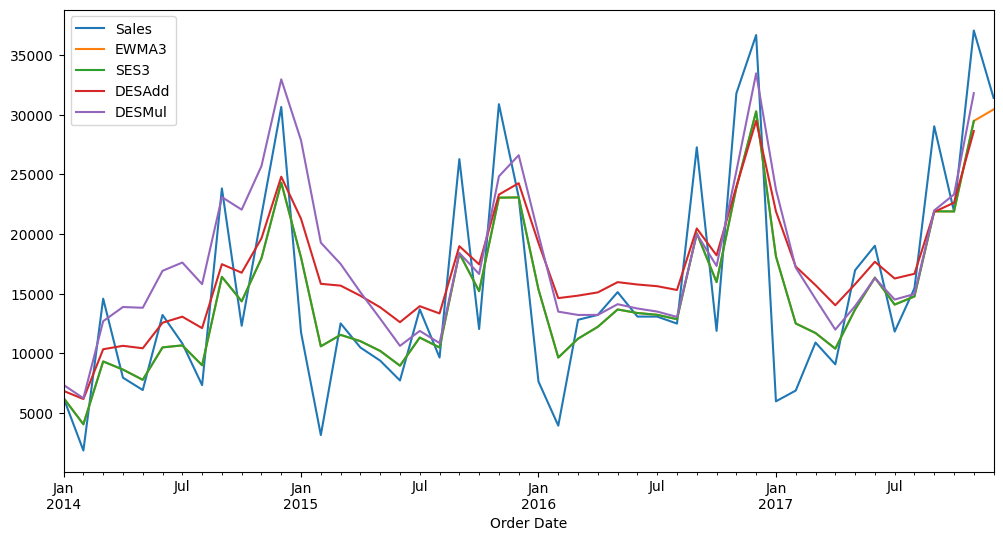

In [47]:
df[['Sales', 'EWMA3', 'SES3', 'DESAdd', 'DESMul']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In above case *multiplicative* adjustment overshoots actual values.

### Triple Exponential Smoothing

This method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 

Here we introduce a smoothing factor $\gamma$ for addressing seasonality.

\begin{align}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model } m = \text{\# periods into the future}\end{align}

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=green>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=green>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>


In [48]:
df['TESAdd'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues

df.head(5)

c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul,TESAdd
Order Date,,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142,6790.384086
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244,2880.555398
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255,10091.659067
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436,9156.845289
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104,11687.553932


### Plot

<Axes: xlabel='Order Date'>

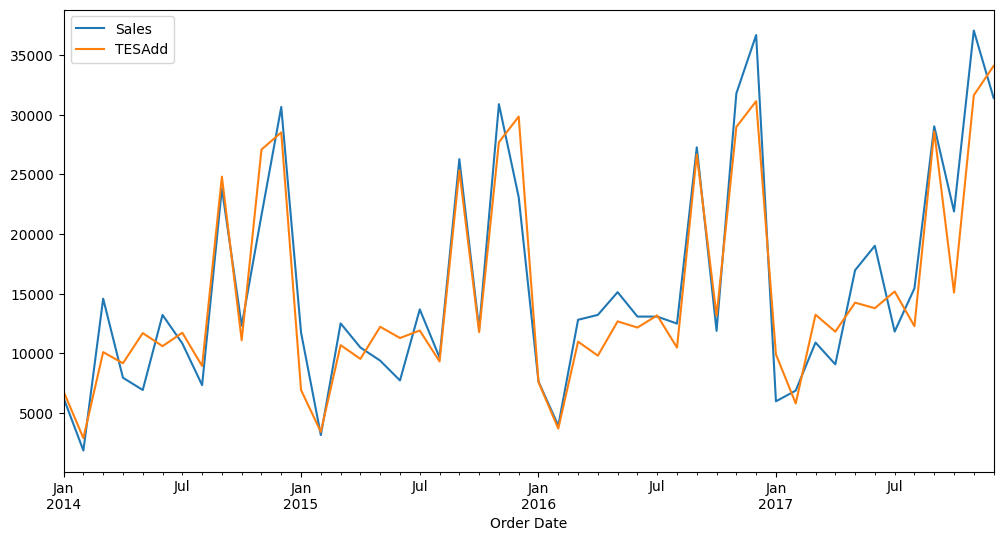

In [49]:
df[['Sales', 'TESAdd']].plot(figsize=(12, 6))

Let's check multiplicative model

In [50]:
df['TESMul'] = ExponentialSmoothing(df['Sales'], trend='add', seasonal='mul', seasonal_periods=12).fit().fittedvalues

df.head(5)

c:\repos\Time-Series-Analysis-and-Forecasting-with-Python\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Sales,EWMA3,SES3,DESAdd,DESMul,TESAdd,TESMul
Order Date,,,,,,,
2014-01-01,6242.525,6242.525000,6242.525000,6838.094443,7335.675142,6790.384086,7711.972734
2014-02-01,1839.658,4041.091500,4041.091500,6158.059556,6227.217244,2880.555398,3953.491893
2014-03-01,14573.956,9307.523750,9307.523750,10331.303615,12683.059255,10091.659067,10099.098151
2014-04-01,7944.837,8626.180375,8626.180375,10618.855469,13873.059436,9156.845289,9393.019754
2014-05-01,6912.787,7769.483688,7769.483688,10414.175718,13809.276104,11687.553932,11273.954916


<Axes: xlabel='Order Date'>

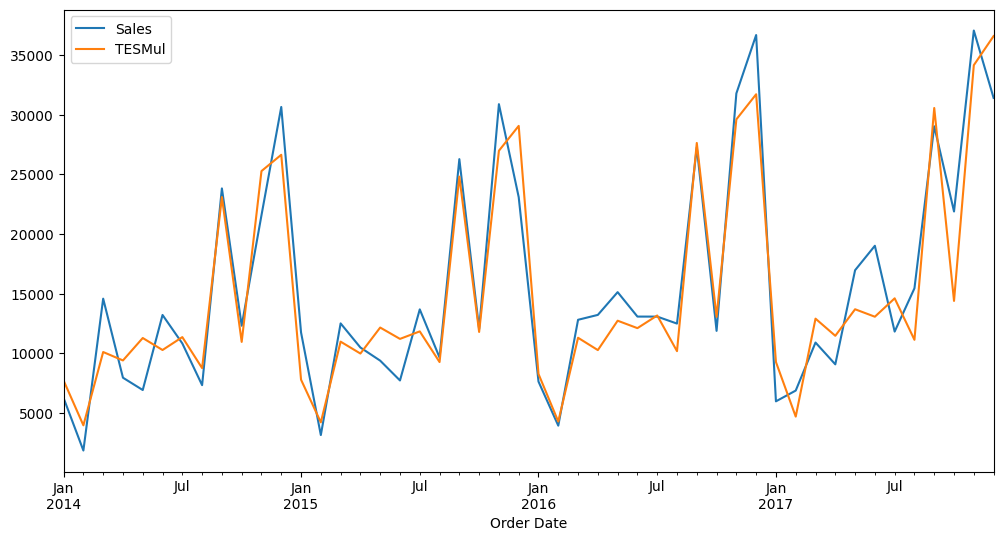

In [51]:
df[['Sales', 'TESMul']].plot(figsize=(12, 6))

Plot both additive and multiplicative model's together

<Axes: xlabel='Order Date'>

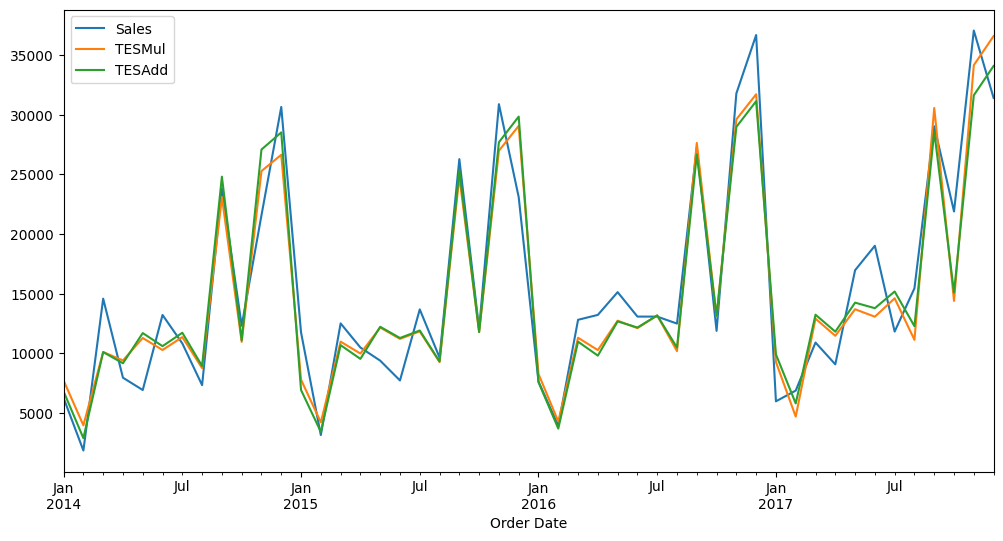

In [53]:
df[['Sales', 'TESMul', 'TESAdd']].plot(figsize=(12, 6))

Additive model seems better here.